In [8]:
# Greedy Best-First Search merupakan sebuah algoritma informed search. Cara kerjanya adalah 
# dengan mengevaluasi nilai heuristik dari node-node fringe dan melakukan expand kepada node
# yang memiliki nilai heuristik yang paling optimal (paling kecil atau paling besar). 

# Program ini bertujuan untuk mencari jalan terpendek dari Magetan ke Surabaya dari graf yang diberikan.
# Maka yang harus kita lakukan adalah expand node fringe dengan nilai heuristik terkecil
# dari Magetan sampai ditemukan Surabaya.

# Pertama-tama, yang harus dilakukan adalah mengimport library yang akan kita pakai. Pada program ini
# akan dibutuhkan struktur data heap atau priority queue, oleh karena itu kita perlu mengimport heapq.
# Untuk visualisasi hasil akhirnya digunakan matplotlib untuk menggambarkan grafnya. Sedangkan *jatim*
# merupakan variabel yang digunakan untuk menyimpan edge graf.

import heapq
import matplotlib.pyplot as plt
import time
jatim = {}

In [9]:
# *PriorityQueue* digunakan untuk menyimpan nilai fringe sekaligus mengurutkannya 
# sehingga lebih mudah untuk mengambil nilai yang paling kecil.

class PriorityQueue:
    def __init__(self) -> None:
        self.cities = []

    def isEmpty(self):
        if self.cities == []:
            return True
        return False

    def check(self):
        print(self.cities)

    def push(self, city, cost):
        heapq.heappush(self.cities, (cost, city))
    
    def pop(self):
        return heapq.heappop(self.cities)[1]

In [10]:
# *CityNode* digunakan untuk merepresentasikan setiap node kota pada graf. 
# Didalamnya terdapat nama dan nilai heuristik setiap kota.

class CityNode:
  def __init__(self, city, distance) -> None:
    self.city = str(city)
    self.distance = str(distance)

In [11]:
# **makeDict()** bekerja dengan membaca isi file *distance.txt* lalu melakukan for loop untuk memisahkan 
# value *city1*, *city2*, *distance* yang dipisah dengan koma ',' lalu diappend ke dictionary *jatim* sehingga
# isinya adalah *city1* dengan *city2* serta jaraknya yang dimiliki.

# setDefault berfungsi jka value belum ada, maka akan dibuatkan *city1* dan diberi [] atau value kosong

def makeDict():
    with open("distance.txt", 'r') as file:
        for line in file:
            city1, city2, dist = line.strip().split(',')
            jatim.setdefault(city1, []).append(CityNode(city2, dist))
            jatim.setdefault(city2, []).append(CityNode(city1, dist))

In [12]:
# **makeHeuristicDict()** bekerja dengan cara membuat dictionary *h* yang isinya merupakan hasil
# for loop dari file *heuristic.txt*. Isi dictionary *h* nanti adalah node/nama kota yang merupakan
# key dan *sld* adalah jarak yang merupakan value.

def makeHeuristicDict():
    h = {}
    with open("heuristic.txt", 'r') as file:
        for line in file:
            node, sld = map(str.strip, line.split(','))
            h[node] = int(sld)
    return h

def heuristic(node, values):
    node = node.strip()
    return values[node] 

In [13]:
city_coords = {
    "Magetan": (150, 25),
    "Ngawi": (230, 40),
    "Madiun": (140, 50),
    "Ponorogo": (80, 45),
    "Bojonegoro": (210, 75),
    "Nganjuk": (130, 80),
    "Lamongan": (240, 120),
    "Jombang": (155, 125),
    "Gresik": (230, 130),
    "Surabaya": (220, 160),
    "Bangkalan": (250, 170),
    "Sampang": (260, 210),
    "Pamekasan": (230, 220),
    "Sumenep": (240, 245),
    "Sidoarjo": (190, 170),
    "Probolinggo": (135, 200),
    "Situbondo": (155, 240)
}

# **greedyBFS()** berisi langkah-langkah searching Greedy Best-First Search. 
# Pertama diinisiasikan variabel *q* sebagai priorityqueue dan *h* untuk menyimpan 
# nilai heuristik setiap kota. Lalu terdapat *path* yang akan menyimpan jalan paling optimal menurut
# algoritma GFBS. Setelah itu searching dimulai dengan mengisi node awal ke dalam *q*. Dari situ
# dilakukan looping yang akan mengexpand elemen *q* yang paling kecil. Setelah diexpand node akan
# dikeluarkan dari *q* jadi isi dari *q* hanyalah node terluar dari tree yang dibentuk algoritma search 
# atau yang disebut dengan fringe. Looping akan berlanjut sampai ditemukan node dengan nama Surabaya.
# Kemudian searching akan berhenti dan menghasilkan *path* yang berisi jalur yang dianggap benar oleh algoritma.

def greedyBFS(start, end):
    path = {start: None}
    q = PriorityQueue()
    h = makeHeuristicDict()

    q.push(start, 0)
    expandList = []

    while not q.isEmpty():
        curr = q.pop()
        expandList.append(curr)

        if curr == end:
            break
        
        for new in jatim[curr]:
            if new.city not in path:
                f_cost = h[new.city]
                q.push(new.city, f_cost)
                path[new.city] = curr

    return [path, expandList]


def printOutput(start, end, path, expandList, city_coords, jatim):
    finalpath = []
    i = end

    while (path.get(i) != None):
        finalpath.append(i)
        i = path[i]
    finalpath.append(start)
    finalpath.reverse()

    print(path)
    print("Membuat Program Greedy BFS Sederhana")
    print(f"{start} => {end}\n")
    print(f"Kota yang mungkin dikunjungi \t\t\t: {expandList}")
    print(f"Jumlah kemungkinan kota \t\t\t: {len(expandList)}\n")
    print(f"Kota yang dilewati dengan jarak terpendek \t: {finalpath}")
    print(f"Jumlah kota yang dilewati \t\t\t: {len(finalpath)}")

    graph = {}
    for city, nodes in jatim.items():
        graph[city] = [(n.city, int(n.distance)) for n in nodes]

    gbfs = finalpath

    for i, j in city_coords.items():
        plt.plot(j[1], j[0], "ro")
        plt.annotate(i, (j[1] + 0.2, j[0]))

        for k in graph[i]:
            n = city_coords[k[0]]
            plt.plot([j[1], n[1]], [j[0], n[0]], "gray")

    for i in range(len(gbfs)):
        try:
            first = city_coords[gbfs[i]]
            second = city_coords[gbfs[i + 1]]
            plt.plot([first[1], second[1]], [first[0], second[0]], "green")
        except:
            continue


    plt.errorbar(1, 1, label="GBFS", color="green")
    plt.errorbar(1, 1, label="ASTAR", color="blue")
    plt.legend(loc="lower left")

    plt.show()


{'Magetan': None, 'Ngawi': 'Magetan', 'Madiun': 'Magetan', 'Ponorogo': 'Magetan', 'Nganjuk': 'Madiun', 'Bojonegoro': 'Nganjuk', 'Jombang': 'Nganjuk', 'Surabaya': 'Jombang'}
Membuat Program Greedy BFS Sederhana
Magetan => Surabaya

Kota yang mungkin dikunjungi 			: ['Magetan', 'Madiun', 'Nganjuk', 'Jombang', 'Surabaya']
Jumlah kemungkinan kota 			: 5

Kota yang dilewati dengan jarak terpendek 	: ['Magetan', 'Madiun', 'Nganjuk', 'Jombang', 'Surabaya']
Jumlah kota yang dilewati 			: 5


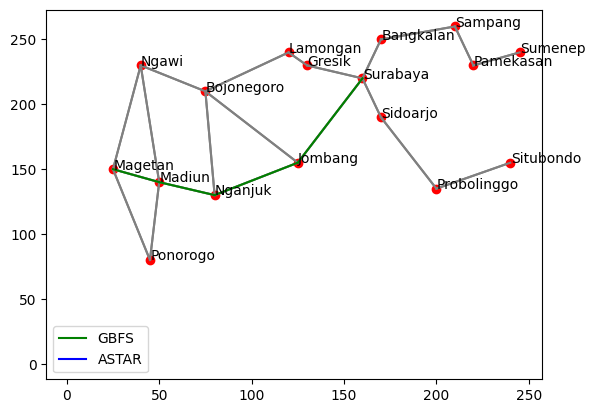

Waktu yang dibutuhkan: 0.0 detik


In [14]:
def main():
    start = time.time()

    src = "Magetan"
    dst = "Surabaya"
    makeDict()

    res = greedyBFS(src, dst)

    end = time.time()
    total_time = end-start
    printOutput(src,dst,res[0],res[1],city_coords,jatim)
    print("Waktu yang dibutuhkan:", str(total_time), "detik")

if __name__ == "__main__":
    main()
